In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g = GaussianNB()
b = BernoulliNB()
from xgboost import XGBClassifier
xgbc = XGBClassifier()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df1 = pd.read_csv("ttrain.csv")

In [4]:
df1.shape

(891, 12)

In [5]:
df2 = pd.read_csv("ttest.csv")

In [6]:
df2.shape

(418, 11)

In [7]:
df = df1.append(df2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10564\281634162.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [8]:
df.shape

(1309, 12)

In [9]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
97,98,1.0,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
419,420,0.0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
259,1151,NaN,3,"Midtsjo, Mr. Karl Albert",male,21.0,0,0,345501,7.7750,NaN,S
62,954,NaN,3,"Bjorklund, Mr. Ernst Herbert",male,18.0,0,0,347090,7.7500,NaN,S
395,1287,NaN,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,C31,S
415,416,0.0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
538,539,0.0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
188,189,0.0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
367,368,1.0,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
312,313,0.0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [13]:
df["Title"] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [14]:
df.Title = df.Name.str.extract(' ([A-Za-z]+)\.')
df.Title = df.Title.replace(["Ms","Mlle"],"Miss")
df.Title = df.Title.replace(["Mme", "Countess","Lady","Dona"], "Mrs")
df.Title = df.Title.replace(["Dr","Major","Col","Sir","Rev","Jonkheer","Capt","Don"],"Mr")

In [15]:
df["Senior"] = df.Age.map(lambda s:1 if s>70 else 0)

In [16]:
df.groupby("Sex")["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.004584
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.067573
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [18]:
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)
df.groupby("Title")["Age"].transform("median")

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  Senior       1309 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [20]:
del df["Cabin"]

In [21]:
df.Fare.fillna(df["Fare"].mean(), inplace=True)

In [22]:
df["Family"] = df["SibSp"] + df["Parch"] + 1

In [23]:
df.Embarked = df.Embarked.fillna("S")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

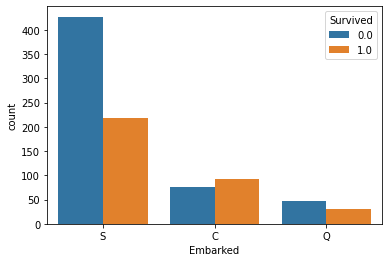

In [24]:
sns.countplot(x="Embarked", hue="Survived", data=df)

<AxesSubplot:ylabel='Frequency'>

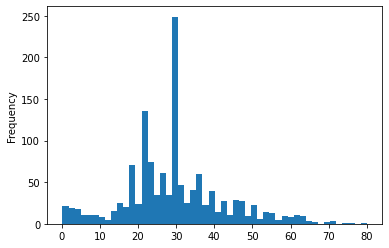

In [25]:
df.Age.plot(kind="hist", bins=50)

In [26]:
df.Family.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [27]:
df["Single"] = df.Family<2
df["Small"] = (df.Family>1) & (df.Family<5)
df["Medium"] = (df.Family>4) & (df.Family<7)
df["Large"] = (df.Family>6)

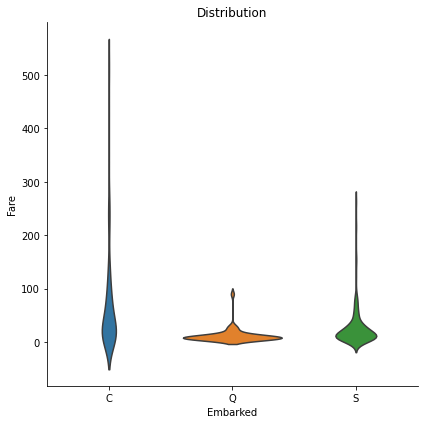

In [28]:
sns.catplot(x="Embarked", y="Fare",kind="violin", inner=None, data=df, height=6, order=["C", "Q", "S"])
plt.title("Distribution")
plt.tight_layout()

In [29]:
del df["Name"]

In [30]:
df.drop(["PassengerId", "Ticket"], axis=1, inplace=True)

In [31]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [32]:
df_train = df_dummies[:891]
df_test = df_dummies[891:]

In [33]:
df_test.shape, df_train.shape

((418, 18), (891, 18))

In [34]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,2,False,True,False,False,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,2,False,True,False,False,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,True,False,False,False,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,2,False,True,False,False,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0


In [35]:
y = df1["Survived"]
del df_train["Survived"]

In [36]:
algorithms = [g,b,k,log,gbc,r,d,xgbc]
names = ["GaussianNB", "BernoulliNB", "K Nearest", "Logistic", "GradientBoosting", "RandomForest", "Decision Tree", "XGBC"]

In [37]:
def algo_test(x,y, algorithms = algorithms, names = names):
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(x,y)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y, algorithms[i].predict(x)))
        precision.append(precision_score(y, algorithms[i].predict(x)))
        recall.append(recall_score(y, algorithms[i].predict(x)))
        f1.append(f1_score(y, algorithms[i].predict(x)))
    metrics = pd.DataFrame(columns=["Accuracy","Precision","Recall","F1"], index=names)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision
    metrics["Recall"] = recall
    metrics["F1"] = f1
    return metrics.sort_values("F1", ascending=False)     

In [38]:
algo_test(df_train,y)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall,F1
RandomForest,0.979798,0.990909,0.956140,0.973214
Decision Tree,0.979798,0.993902,0.953216,0.973134
XGBC,0.964085,0.969697,0.935673,0.952381
GradientBoosting,0.893378,0.899676,0.812865,0.854071
Logistic,0.829405,0.798742,0.742690,0.769697
GaussianNB,0.820426,0.764535,0.769006,0.766764
BernoulliNB,0.810325,0.758209,0.742690,0.750369
K Nearest,0.815937,0.787097,0.713450,0.748466


In [39]:
df_test.shape

(418, 18)

In [40]:
df_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,0,1,True,False,False,False,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,0,2,False,True,False,False,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,0,1,True,False,False,False,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,0,1,True,False,False,False,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,0,3,False,True,False,False,0,0,1,0,0,1


In [41]:
del df_test["Survived"]

In [42]:
tahmin = r.predict(df_test)

In [43]:
tahmin

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
sonuc = df2[["PassengerId"]]

In [45]:
sonuc["Survived"] = tahmin

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10564\1576471053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"] = tahmin


In [46]:
sonuc.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [47]:
#sonuc.to_csv("titanic_result.csv", index=False)